In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 함수

In [2]:
def local(L,i):
  N = L*L
  right = i+1-L*(i%L==L-1)
  left = i-1+L*(i%L==0)
  up = i-L+N*(i//L==0)
  down = i+L-N*(i//L==L-1)
  return np.array([right,up,left,down])

In [3]:
def find_root(ptr, idx):
  idx = int(idx)
  if ptr[idx] < 0:
    return [idx, ptr[idx]]
  else:
    return find_root(ptr, ptr[idx])

## L=20일때,

In [4]:
L=20
bond_list=[]
for i in range(L*L):
  bond_list.append([i,local(L,i)[0]])
  bond_list.append([i,local(L,i)[1]])

order = np.random.permutation(bond_list)
print(order[:10])

[[213 214]
 [231 211]
 [357 358]
 [102 103]
 [143 144]
 [392 372]
 [182 183]
 [395 396]
 [330 310]
 [365 366]]


In [5]:
ptr = np.ones(L*L)*-1
big_list=[]

for i,j in order:
  i_r_idx,i_r_size = find_root(ptr, i) #그 요소가 포함되어 있는 클러스터의 루트의 위치와 클러스터의 크기를 알아내다.
  j_r_idx,j_r_size = find_root(ptr, j)

  if i_r_idx != j_r_idx: #같은 클러스터가 아니면,

    if j_r_size > i_r_size: #크기가 더 큰 클러스터에 작은 클러스터가 합쳐진다.
      ptr[i_r_idx] = i_r_size+j_r_size
      ptr[j_r_idx] = i_r_idx
    else:
      ptr[j_r_idx] = j_r_size+i_r_size
      ptr[i_r_idx] = j_r_idx

  # for l in range(len(ptr)):
  #   if ptr[l] >= 0:
  #     ptr[l] = find_root(ptr,l)[0]

  big_list.append(min(ptr)*-1)

Text(0.5, 1.0, 'bond percolation')

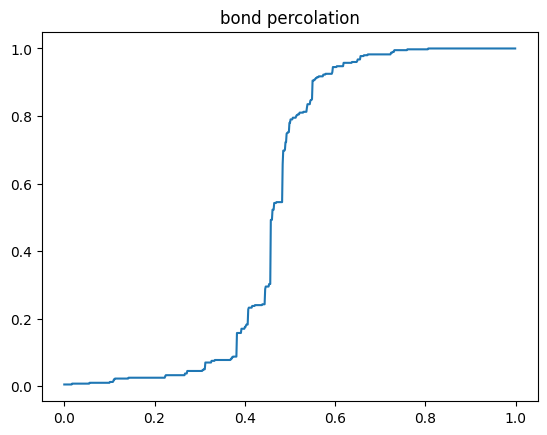

In [6]:
plt.plot(np.arange(2*L*L)/(2*L*L),np.array(big_list)/(L*L))
plt.title('bond percolation')

## 함수화

In [12]:
def find_big_percolation(L):
    bond_list=[]
    for i in range(L*L):
      bond_list.append([i,local(L,i)[0]])
      bond_list.append([i,local(L,i)[1]])

    order = np.random.permutation(bond_list)

    ptr = np.ones(L*L)*-1
    big_list=[]

    for i,j in order:
      i_r_idx,i_r_size = find_root(ptr, i)
      j_r_idx,j_r_size = find_root(ptr, j)

      if i_r_idx != j_r_idx: #같은 클러스터가 아니면,

        if j_r_size > i_r_size: #크기가 더 큰 클러스터에 작은 클러스터가 합쳐진다.
          ptr[i_r_idx] = i_r_size+j_r_size
          ptr[j_r_idx] = i_r_idx
        else:
          ptr[j_r_idx] = i_r_size+j_r_size
          ptr[i_r_idx] = j_r_idx

      big_list.append(min(ptr)*-1)
    return big_list

## 실행, 결과

0,1,2,3,4,5,6,7,8,9,.
CPU times: user 316 ms, sys: 979 µs, total: 317 ms
Wall time: 318 ms


Text(0.5, 1.0, 'bond percolation')

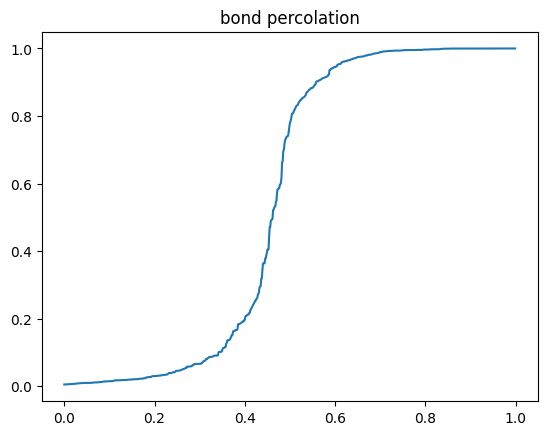

In [13]:
%%time

# L=20배열의 10번의 평균
t,L = 10,20

big_l_list=[]
for i in range(t):
  print(i,end=',')
  big_l_list.append(find_big_percolation(L))
print('.')
big_l_list = np.array(big_l_list)
result = (big_l_list.sum(axis=0))/t

plt.plot(np.arange(2*L*L)/(2*L*L),np.array(result)/(L*L))
plt.title('bond percolation')

0,1,2,3,4,5,6,7,8,9,.
CPU times: user 2min 44s, sys: 473 ms, total: 2min 44s
Wall time: 2min 47s


Text(0.5, 1.0, 'bond percolation')

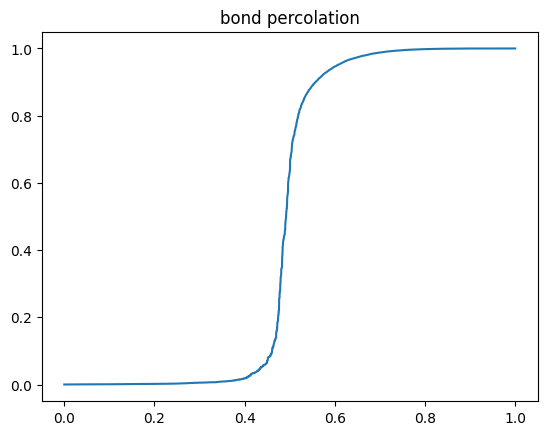

In [14]:
%%time

# L=100배열의 10번의 평균
t,L = 10,100

big_l_list=[]
for i in range(t):
  print(i,end=',')
  big_l_list.append(find_big_percolation(L))
print('.')
big_l_list = np.array(big_l_list)
result = (big_l_list.sum(axis=0))/t

plt.plot(np.arange(2*L*L)/(2*L*L),np.array(result)/(L*L))
plt.title('bond percolation')